<a href="https://colab.research.google.com/github/rhmdnrhuda/RNN-Exploration/blob/master/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Membuat RNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()

In [0]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units = 1))

Model 1:  optimizer = adam  dan batch_size = 32

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0011
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.7277e-04
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 8.8053e-04
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.6438e-04
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 9.7128e-04
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 12/100
1198/1198 [==============================] - 

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

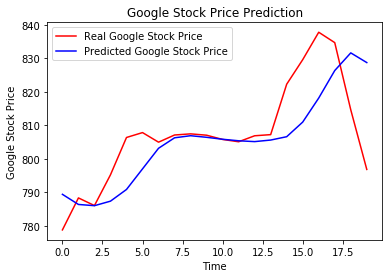

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Model 2: Optimizer = sgd dan batch_size = 32

In [0]:
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 8.2640e-04
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.6339e-04
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.2798e-04
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.0682e-04
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.6782e-04
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.3691e-04
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.3787e-04
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.1666e-04
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 7.7314e-04
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.1882e-04
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 8.9822e-04
Epoch 12/100
1198/

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Model 3:  oprimizer = adam dan batch_size = 16

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 13s 11ms/step - loss: 0.0264
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0045
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0042
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0040
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0038
Epoch 8/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0031
Epoch 11/100
1198/1198 [======================

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

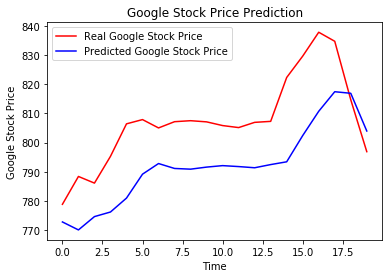

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()